In [1]:
#Basic Libraries
import pandas as pd
import numpy as np
from sklearn import model_selection
import sklearn
#Plotting libraries
import matplotlib
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
%matplotlib inline 

import seaborn as sns
sns.set(style="white", color_codes=True)
sns.set(font_scale=1.5)

###Sklearn Libraries
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold

### Importing data

In [2]:
location=r'G:\Python_dataframes\Mercedes_Benz\train.csv'
df=pd.read_csv(location)
df.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


### General Checks

In [3]:
df.shape

(4209, 378)

In [4]:
df.columns

Index(['ID', 'y', 'X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8',
       ...
       'X375', 'X376', 'X377', 'X378', 'X379', 'X380', 'X382', 'X383', 'X384',
       'X385'],
      dtype='object', length=378)

In [5]:
df.drop(['ID'],axis=1,inplace=True)
df.head()

,y,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,130.81,k,v,at,a,d,u,j,o,0,...,0,0,1,0,0,0,0,0,0,0
1,88.53,k,t,av,e,d,y,l,o,0,...,1,0,0,0,0,0,0,0,0,0
2,76.26,az,w,n,c,d,x,j,x,0,...,0,0,0,0,0,0,1,0,0,0
3,80.62,az,t,n,f,d,x,l,e,0,...,0,0,0,0,0,0,0,0,0,0
4,78.02,az,v,n,f,d,h,d,n,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
df['y'].describe()

count    4209.000000
mean      100.669318
std        12.679381
min        72.110000
25%        90.820000
50%        99.150000
75%       109.010000
max       265.320000
Name: y, dtype: float64

#### As maximum and minimum values are well within range of mean. Outliers must not be present in Y data. 

In [7]:
X=df.drop(['y'],axis=1)
y=df.y

In [8]:
X.shape

(4209, 376)

In [9]:
arr=np.array(X.dtypes)
S=pd.Series(arr)
S

0      object
1      object
2      object
3      object
4      object
        ...  
371     int64
372     int64
373     int64
374     int64
375     int64
Length: 376, dtype: object

In [10]:
S.value_counts()

int64     368
object      8
dtype: int64

In [11]:
arr=np.array(y.isna().sum())
arr

array(0, dtype=int64)

In [12]:
arr=np.array(X.isna().sum())
arr

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

No null values are present

## Removing columns with Zero Variance

In [13]:
from sklearn.feature_selection import VarianceThreshold

In [14]:
vt = VarianceThreshold(threshold=0)

In [15]:
X_num = X.select_dtypes(include='number')
X_num.shape

(4209, 368)

In [16]:
_ = vt.fit(X_num)

mask = vt.get_support()

In [17]:
X_num = X_num.loc[:, mask]

In [18]:
X_num.shape

(4209, 356)

In [19]:
X_num.head()

,X10,X12,X13,X14,X15,X16,X17,X18,X19,X20,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,0,1,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
X_num.columns

Index(['X10', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20',
       ...
       'X375', 'X376', 'X377', 'X378', 'X379', 'X380', 'X382', 'X383', 'X384',
       'X385'],
      dtype='object', length=356)

## Removing Multicollinearity



VIF Cannot be used for categorical columns.
for Categorical columns we need to use Chi sqaure test or correlation coeffcients such as 
Pearson
Spearman
Kendall Tau



In [23]:
corr=X_num.corr(method='kendall')

In [24]:
corr

,X10,X12,X13,X14,X15,X16,X17,X18,X19,X20,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
X10,1.000000,-0.033084,-0.028806,-0.100474,-0.002532,-0.005944,-0.010164,-0.010323,-0.038610,-0.047393,...,0.165277,-0.028618,-0.074244,-0.016870,-0.011374,-0.010479,-0.010164,-0.004740,-0.002532,-0.004387
X12,-0.033084,1.000000,0.214825,-0.246513,-0.006212,-0.014584,-0.024937,-0.025327,-0.094730,-0.116280,...,-0.107864,-0.070214,0.030134,-0.016043,-0.027907,-0.005566,-0.024937,-0.011628,-0.006212,-0.010765
X13,-0.028806,0.214825,1.000000,-0.083141,-0.005409,-0.012698,-0.021713,-0.010525,-0.082482,-0.043126,...,-0.169721,-0.061136,0.357229,-0.036040,-0.024299,0.023045,-0.021713,-0.010125,0.041242,-0.009373
X14,-0.100474,-0.246513,-0.083141,1.000000,-0.018865,-0.044291,0.012713,-0.076916,-0.287691,-0.353137,...,0.118950,0.026496,-0.097464,-0.037958,0.103309,0.007743,0.012713,0.023604,0.025199,0.043667
X15,-0.002532,-0.006212,-0.005409,-0.018865,1.000000,-0.001116,-0.001908,-0.001938,-0.007250,-0.008899,...,-0.014917,-0.005373,0.032168,-0.003168,-0.002136,-0.001968,-0.001908,-0.000890,-0.000475,-0.000824
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
X380,-0.010479,-0.005566,0.023045,0.007743,-0.001968,-0.004619,-0.007899,-0.008022,-0.021140,-0.006485,...,-0.061741,-0.022240,-0.061168,-0.013110,-0.008839,1.000000,-0.007899,-0.003683,-0.001968,-0.003410
X382,-0.010164,-0.024937,-0.021713,0.012713,-0.001908,-0.004480,1.000000,0.085256,-0.029102,-0.027905,...,-0.059883,-0.021571,-0.059327,-0.012716,-0.008573,-0.007899,1.000000,-0.003572,-0.001908,-0.003307
X383,-0.004740,-0.011628,-0.010125,0.023604,-0.000890,-0.002089,-0.003572,0.062481,-0.013571,0.000008,...,-0.015413,-0.010059,0.035107,-0.005930,-0.003998,-0.003683,-0.003572,1.000000,-0.000890,-0.001542
X384,-0.002532,-0.006212,0.041242,0.025199,-0.000475,-0.001116,-0.001908,-0.001938,-0.007250,-0.008899,...,-0.014917,-0.005373,0.008694,-0.003168,-0.002136,-0.001968,-0.001908,-0.000890,1.000000,-0.000824


In [25]:
corr.abs()

,X10,X12,X13,X14,X15,X16,X17,X18,X19,X20,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
X10,1.000000,0.033084,0.028806,0.100474,0.002532,0.005944,0.010164,0.010323,0.038610,0.047393,...,0.165277,0.028618,0.074244,0.016870,0.011374,0.010479,0.010164,0.004740,0.002532,0.004387
X12,0.033084,1.000000,0.214825,0.246513,0.006212,0.014584,0.024937,0.025327,0.094730,0.116280,...,0.107864,0.070214,0.030134,0.016043,0.027907,0.005566,0.024937,0.011628,0.006212,0.010765
X13,0.028806,0.214825,1.000000,0.083141,0.005409,0.012698,0.021713,0.010525,0.082482,0.043126,...,0.169721,0.061136,0.357229,0.036040,0.024299,0.023045,0.021713,0.010125,0.041242,0.009373
X14,0.100474,0.246513,0.083141,1.000000,0.018865,0.044291,0.012713,0.076916,0.287691,0.353137,...,0.118950,0.026496,0.097464,0.037958,0.103309,0.007743,0.012713,0.023604,0.025199,0.043667
X15,0.002532,0.006212,0.005409,0.018865,1.000000,0.001116,0.001908,0.001938,0.007250,0.008899,...,0.014917,0.005373,0.032168,0.003168,0.002136,0.001968,0.001908,0.000890,0.000475,0.000824
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
X380,0.010479,0.005566,0.023045,0.007743,0.001968,0.004619,0.007899,0.008022,0.021140,0.006485,...,0.061741,0.022240,0.061168,0.013110,0.008839,1.000000,0.007899,0.003683,0.001968,0.003410
X382,0.010164,0.024937,0.021713,0.012713,0.001908,0.004480,1.000000,0.085256,0.029102,0.027905,...,0.059883,0.021571,0.059327,0.012716,0.008573,0.007899,1.000000,0.003572,0.001908,0.003307
X383,0.004740,0.011628,0.010125,0.023604,0.000890,0.002089,0.003572,0.062481,0.013571,0.000008,...,0.015413,0.010059,0.035107,0.005930,0.003998,0.003683,0.003572,1.000000,0.000890,0.001542
X384,0.002532,0.006212,0.041242,0.025199,0.000475,0.001116,0.001908,0.001938,0.007250,0.008899,...,0.014917,0.005373,0.008694,0.003168,0.002136,0.001968,0.001908,0.000890,1.000000,0.000824


In [26]:
mask_true_upper = np.triu(np.ones_like(corr, dtype=bool))

In [27]:
mask_true_upper

array([[ True,  True,  True, ...,  True,  True,  True],
       [False,  True,  True, ...,  True,  True,  True],
       [False, False,  True, ...,  True,  True,  True],
       ...,
       [False, False, False, ...,  True,  True,  True],
       [False, False, False, ..., False,  True,  True],
       [False, False, False, ..., False, False,  True]])

In [28]:
%%time
corr_upper_df = corr.abs().mask(mask_true_upper)

Wall time: 41.3 ms


In [29]:
corr_upper_df

,X10,X12,X13,X14,X15,X16,X17,X18,X19,X20,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
X10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
X12,0.033084,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
X13,0.028806,0.214825,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
X14,0.100474,0.246513,0.083141,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
X15,0.002532,0.006212,0.005409,0.018865,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
X380,0.010479,0.005566,0.023045,0.007743,0.001968,0.004619,0.007899,0.008022,0.021140,0.006485,...,0.061741,0.022240,0.061168,0.013110,0.008839,NaN,NaN,NaN,NaN,NaN
X382,0.010164,0.024937,0.021713,0.012713,0.001908,0.004480,1.000000,0.085256,0.029102,0.027905,...,0.059883,0.021571,0.059327,0.012716,0.008573,0.007899,NaN,NaN,NaN,NaN
X383,0.004740,0.011628,0.010125,0.023604,0.000890,0.002089,0.003572,0.062481,0.013571,0.000008,...,0.015413,0.010059,0.035107,0.005930,0.003998,0.003683,0.003572,NaN,NaN,NaN
X384,0.002532,0.006212,0.041242,0.025199,0.000475,0.001116,0.001908,0.001938,0.007250,0.008899,...,0.014917,0.005373,0.008694,0.003168,0.002136,0.001968,0.001908,0.000890,NaN,NaN


In [30]:
np.nanmin(corr_upper_df.min().values), np.nanmax(corr_upper_df.max().values)

(7.919220786436637e-06, 1.0)

In [31]:
### We will allow the columns that have multicollinearity less than 0.85
corr_threshold = 0.85
correlated_cols = [each_col for each_col in corr_upper_df.columns if any(corr_upper_df[each_col] > corr_threshold)]

In [32]:
len(correlated_cols)

113

In [33]:
print(correlated_cols)

['X14', 'X17', 'X19', 'X29', 'X31', 'X33', 'X35', 'X44', 'X45', 'X48', 'X49', 'X52', 'X53', 'X54', 'X58', 'X60', 'X61', 'X62', 'X63', 'X66', 'X67', 'X71', 'X76', 'X80', 'X84', 'X85', 'X87', 'X88', 'X89', 'X90', 'X94', 'X96', 'X98', 'X99', 'X101', 'X102', 'X108', 'X111', 'X112', 'X113', 'X118', 'X119', 'X122', 'X125', 'X126', 'X127', 'X128', 'X130', 'X134', 'X136', 'X137', 'X138', 'X140', 'X142', 'X147', 'X150', 'X152', 'X154', 'X155', 'X156', 'X161', 'X162', 'X166', 'X170', 'X172', 'X178', 'X179', 'X184', 'X185', 'X186', 'X187', 'X189', 'X191', 'X194', 'X198', 'X202', 'X204', 'X208', 'X214', 'X217', 'X219', 'X226', 'X228', 'X230', 'X232', 'X238', 'X239', 'X240', 'X241', 'X242', 'X243', 'X246', 'X248', 'X249', 'X250', 'X253', 'X261', 'X262', 'X263', 'X264', 'X272', 'X276', 'X279', 'X295', 'X298', 'X325', 'X331', 'X333', 'X334', 'X346', 'X349', 'X352', 'X364']


In [34]:
X_num2=X_num.drop(['X14','X17', 'X19', 'X29', 'X31', 'X33', 'X35', 'X44', 'X45', 'X48', 'X49', 'X52', 'X53', 'X54', 'X58', 'X60', 'X61', 'X62', 'X63', 'X66', 'X67', 'X71', 'X76', 'X80', 'X84', 'X85', 'X87', 'X88', 'X89', 'X90', 'X94', 'X96', 'X98', 'X99', 'X101', 'X102', 'X108', 'X111', 'X112', 'X113', 'X118', 'X119', 'X122', 'X125', 'X126', 'X127', 'X128', 'X130', 'X134', 'X136', 'X137', 'X138', 'X140', 'X142', 'X147', 'X150', 'X152', 'X154', 'X155', 'X156', 'X161', 'X162', 'X166', 'X170', 'X172', 'X178', 'X179', 'X184', 'X185', 'X186', 'X187', 'X189', 'X191', 'X194', 'X198', 'X202', 'X204', 'X208', 'X214', 'X217', 'X219', 'X226', 'X228', 'X230', 'X232', 'X238', 'X239', 'X240', 'X241', 'X242', 'X243', 'X246', 'X248', 'X249', 'X250', 'X253', 'X261', 'X262', 'X263', 'X264', 'X272', 'X276', 'X279', 'X295', 'X298', 'X325', 'X331', 'X333', 'X334', 'X346', 'X349', 'X352', 'X364'],axis=1)

In [35]:
X_num2.head()

,X10,X12,X13,X15,X16,X18,X20,X21,X22,X23,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,0,1,0,0,1,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
X_num2.shape

(4209, 243)

### Generating Dummy variables for alphabetical columns. They have more than two categories in this case.

In [37]:
X_obj=X.select_dtypes(include='object')
X_obj

,X0,X1,X2,X3,X4,X5,X6,X8
0,k,v,at,a,d,u,j,o
1,k,t,av,e,d,y,l,o
2,az,w,n,c,d,x,j,x
3,az,t,n,f,d,x,l,e
4,az,v,n,f,d,h,d,n
...,...,...,...,...,...,...,...,...
4204,ak,s,as,c,d,aa,d,q
4205,j,o,t,d,d,aa,h,h
4206,ak,v,r,a,d,aa,g,e
4207,al,r,e,f,d,aa,l,u


In [38]:
X=pd.concat([X_obj,X_num2],axis=1)
X

,X0,X1,X2,X3,X4,X5,X6,X8,X10,X12,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,k,v,at,a,d,u,j,o,0,0,...,0,0,1,0,0,0,0,0,0,0
1,k,t,av,e,d,y,l,o,0,0,...,1,0,0,0,0,0,0,0,0,0
2,az,w,n,c,d,x,j,x,0,0,...,0,0,0,0,0,0,1,0,0,0
3,az,t,n,f,d,x,l,e,0,0,...,0,0,0,0,0,0,0,0,0,0
4,az,v,n,f,d,h,d,n,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,ak,s,as,c,d,aa,d,q,0,0,...,1,0,0,0,0,0,0,0,0,0
4205,j,o,t,d,d,aa,h,h,0,0,...,0,1,0,0,0,0,0,0,0,0
4206,ak,v,r,a,d,aa,g,e,0,1,...,0,0,1,0,0,0,0,0,0,0
4207,al,r,e,f,d,aa,l,u,0,0,...,0,0,0,0,0,0,0,0,0,0


Labels or dummy variable creation

In [39]:
X_obj.columns

Index(['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8'], dtype='object')

In [40]:
list_of_object_numbers=[]
for i in X_obj.columns:
    list_of_object_numbers.append(X_obj[i].nunique())
a=['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8']
print(a)
print(list_of_object_numbers)
  

['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8']
[47, 27, 44, 7, 4, 29, 12, 25]


There are lot of categories in each column, creating dummy varibales of these columns will increase the number of columns significantly. We need to find a way for this prolblem.

Select Top occuring categories that appear most of the times from each categorical columns.

In [41]:
X0=X_obj.X0.value_counts().sort_values(ascending=False).to_frame()
X1=X_obj.X1.value_counts().sort_values(ascending=False).to_frame()
X2=X_obj.X2.value_counts().sort_values(ascending=False).to_frame()
X3=X_obj.X3.value_counts().sort_values(ascending=False).to_frame()
X4=X_obj.X4.value_counts().sort_values(ascending=False).to_frame()
X5=X_obj.X5.value_counts().sort_values(ascending=False).to_frame()
X6=X_obj.X6.value_counts().sort_values(ascending=False).to_frame()
X8=X_obj.X8.value_counts().sort_values(ascending=False).to_frame()

In [42]:
len(X8)

25

In [43]:
from IPython.display import display_html
from itertools import chain,cycle
def display_side_by_side(*args,titles=cycle([''])):
    html_str=''
    for df,title in zip(args, chain(titles,cycle(['</br>'])) ):
        html_str+='<th style="text-align:center"><td style="vertical-align:top">'
        html_str+=f'<h2 style="text-align: center;">{title}</h2>'
        html_str+=df.to_html().replace('table','table style="display:inline"')
        html_str+='</td></th>'
    display_html(html_str,raw=True)

In [44]:
display_side_by_side(X0,X1,X2,X3,X4,X5,X6,X8, titles=['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8'])

,X0
z,360
ak,349
y,324
ay,313
t,306
x,300
o,269
f,227
n,195
w,182


**We can drop X4 column as it has minimum variance**

In [45]:
X_obj.drop(['X4'],axis=1,inplace=True)

In [46]:
X_obj.head()

,X0,X1,X2,X3,X5,X6,X8
0,k,v,at,a,u,j,o
1,k,t,av,e,y,l,o
2,az,w,n,c,x,j,x
3,az,t,n,f,x,l,e
4,az,v,n,f,h,d,n


In [47]:
# let's make a list with the most frequent categories of the variable

top_15_X0_labels=[y for y in X_obj.X0.value_counts().sort_values(ascending=False).head(15).index]
top_9_X1_lables=[y for y in X_obj.X1.value_counts().sort_values(ascending=False).head(9).index]
top_7_X2_lables=[y for y in X_obj.X2.value_counts().sort_values(ascending=False).head(7).index]
top_6_X3_lables=[y for y in X_obj.X3.value_counts().sort_values(ascending=False).head(6).index]
top_18_X5_lables=[y for y in X_obj.X5.value_counts().sort_values(ascending=False).head(18).index]
top_7_X6_lables=[y for y in X_obj.X6.value_counts().sort_values(ascending=False).head(7).index]
top_14_X8_lables=[y for y in X_obj.X8.value_counts().sort_values(ascending=False).head(14).index]


In [48]:
# get whole set of dummy variables, for all the categorical variables

def one_hot_encoding_top_x(df, variable, top_x_labels):
    # function to create the dummy variables for the most frequent labels
    # we can vary the number of most frequent labels that we encode
    
    for label in top_x_labels:
        df[variable+'_'+label] = np.where(df[variable]==label, 1, 0)

In [49]:
one_hot_encoding_top_x(X_obj, 'X0', top_15_X0_labels)
one_hot_encoding_top_x(X_obj, 'X1', top_9_X1_lables)
one_hot_encoding_top_x(X_obj, 'X2', top_7_X2_lables)
one_hot_encoding_top_x(X_obj, 'X3', top_6_X3_lables)
one_hot_encoding_top_x(X_obj, 'X5', top_18_X5_lables)
one_hot_encoding_top_x(X_obj, 'X6', top_7_X6_lables)
one_hot_encoding_top_x(X_obj, 'X8', top_14_X8_lables)

In [50]:
X_obj.head()

,X0,X1,X2,X3,X5,X6,X8,X0_z,X0_ak,X0_y,...,X8_i,X8_e,X8_r,X8_a,X8_w,X8_v,X8_b,X8_k,X8_o,X8_m
0,k,v,at,a,u,j,o,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,k,t,av,e,y,l,o,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,az,w,n,c,x,j,x,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,az,t,n,f,x,l,e,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,az,v,n,f,h,d,n,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [51]:
X_obj2=X_obj.drop(['X0', 'X1', 'X2', 'X3','X5', 'X6', 'X8'],axis=1)

In [52]:
X_obj2.head()

,X0_z,X0_ak,X0_y,X0_ay,X0_t,X0_x,X0_o,X0_f,X0_n,X0_w,...,X8_i,X8_e,X8_r,X8_a,X8_w,X8_v,X8_b,X8_k,X8_o,X8_m
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [53]:
X1=pd.concat([X_obj2,X_num2],axis=1)
X1.head()

,X0_z,X0_ak,X0_y,X0_ay,X0_t,X0_x,X0_o,X0_f,X0_n,X0_w,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
X=X1
X.head()

,X0_z,X0_ak,X0_y,X0_ay,X0_t,X0_x,X0_o,X0_f,X0_n,X0_w,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [55]:
X.shape

(4209, 319)

In [56]:
y.head()

0    130.81
1     88.53
2     76.26
3     80.62
4     78.02
Name: y, dtype: float64

### Splitting the data set into training and testing set for model building

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=5)

## Using Linear Regression model

In [58]:
linreg=LinearRegression()

In [59]:
lr=linreg.fit(X_train,y_train)

In [60]:
y_pred=lr.predict(X_test)

In [61]:
# Model evaluation metrics for regression
print('Mean Abs Error   MAE    : ', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Sq  Error MSE      : ', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Sq Error RMSE : ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('MAPE                    : ', np.mean(np.abs((y_test - y_pred) / y_test)) * 100)
print('MPE                     : ', np.mean((y_test - y_pred) / y_test) * 100)
print('r2 value                : ', metrics.r2_score(y_test, y_pred))

Mean Abs Error   MAE    :  70184793155.65593
Mean Sq  Error MSE      :  7.179844824478835e+23
Root Mean Sq Error RMSE :  847339649991.5979
MAPE                    :  62686909900.68275
MPE                     :  41103427431.34856
r2 value                :  -4.4471914316070954e+21


**Multiple Linear Regression cannot be performed as R2 value is negative that indicates that Regression error is even worse or more than the Total error.**

## Lets Check the results using L2 Regularization, We are using L2 regularization because there are large number of columns with multicollinearity between them, L1 regularization is used if we have less number of columns

## Hyperparameter tuning for Ridge Regression

In [62]:
n_alphas = 200
alphas   = np.logspace(-7, 7, n_alphas)
alphas

array([1.00000000e-07, 1.17584955e-07, 1.38262217e-07, 1.62575567e-07,
       1.91164408e-07, 2.24780583e-07, 2.64308149e-07, 3.10786619e-07,
       3.65438307e-07, 4.29700470e-07, 5.05263107e-07, 5.94113398e-07,
       6.98587975e-07, 8.21434358e-07, 9.65883224e-07, 1.13573336e-06,
       1.33545156e-06, 1.57029012e-06, 1.84642494e-06, 2.17111795e-06,
       2.55290807e-06, 3.00183581e-06, 3.52970730e-06, 4.15040476e-06,
       4.88025158e-06, 5.73844165e-06, 6.74754405e-06, 7.93409667e-06,
       9.32930403e-06, 1.09698580e-05, 1.28989026e-05, 1.51671689e-05,
       1.78343088e-05, 2.09704640e-05, 2.46581108e-05, 2.89942285e-05,
       3.40928507e-05, 4.00880633e-05, 4.71375313e-05, 5.54266452e-05,
       6.51733960e-05, 7.66341087e-05, 9.01101825e-05, 1.05956018e-04,
       1.24588336e-04, 1.46497140e-04, 1.72258597e-04, 2.02550194e-04,
       2.38168555e-04, 2.80050389e-04, 3.29297126e-04, 3.87203878e-04,
       4.55293507e-04, 5.35356668e-04, 6.29498899e-04, 7.40196000e-04,
      

In [63]:
coefs = []

for a in alphas:
    
    ridge = linear_model.Ridge(alpha=a, fit_intercept=False)
    
    ridge.fit(X, y)
    
    coefs.append(ridge.coef_)

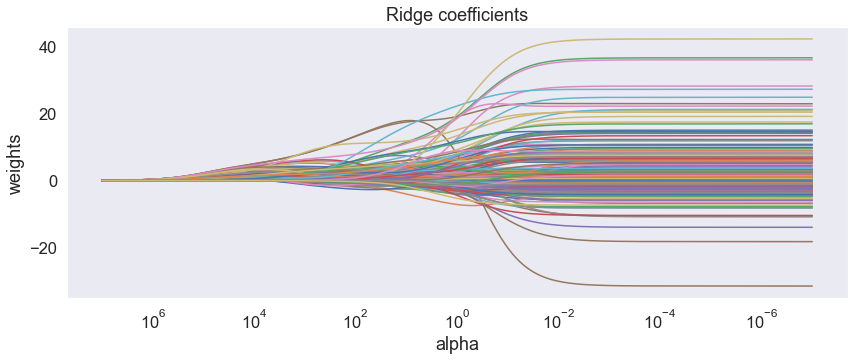

In [64]:
plt.figure(figsize=(14, 5))
plt.grid()

ax = plt.gca()

ax.plot(alphas, coefs)

ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis

plt.xlabel('alpha')
plt.ylabel('weights')

plt.title('Ridge coefficients');

Lets check for values between 10^6 and 10^4

In [65]:
n_alphas = 200
alphas   = np.logspace(4, 6, n_alphas)
alphas

array([  10000.        ,   10234.11402105,   10473.70897959,
         10718.91319205,   10969.85797892,   11226.67773511,
         11489.51000187,   11758.49554052,   12033.77840778,
         12315.50603293,   12603.8292968 ,   12898.90261253,
         13200.88400831,   13509.93521198,   13826.22173765,
         14149.91297435,   14481.18227675,   14820.20705799,
         15167.16888471,   15522.25357427,   15885.65129428,
         16257.55666444,   16638.16886076,   17027.69172226,
         17426.3338601 ,   17834.30876932,   18251.83494319,
         18679.13599021,   19116.44075386,   19563.98343517,
         20022.00371816,   20490.74689816,   20970.46401323,
         21461.41197858,   21963.85372417,   22478.05833549,
         23004.30119773,   23542.86414322,   24094.0356024 ,
         24658.11075823,   25235.39170435,   25826.18760683,
         26430.81486974,   27049.59730463,   27682.86630392,
         28330.96101839,   28994.22853883,   29673.02408189,
         30367.71118035,

In [66]:
coefs = []

for a in alphas:
    
    ridge = linear_model.Ridge(alpha=a, fit_intercept=False)
    
    ridge.fit(X, y)
    
    coefs.append(ridge.coef_)

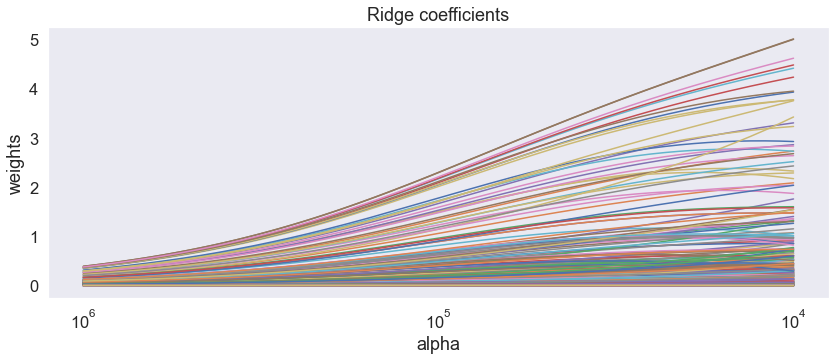

In [67]:
plt.figure(figsize=(14, 5))
plt.grid()

ax = plt.gca()

ax.plot(alphas, coefs)

ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis

plt.xlabel('alpha')
plt.ylabel('weights')

plt.title('Ridge coefficients');

consider 10^5 as a value of alpha

In [68]:
    ridge = linear_model.Ridge(alpha=10^5, fit_intercept=False)
    
    ridge.fit(X_train, y_train)

Ridge(alpha=15, fit_intercept=False)

In [69]:
y_pred=ridge.predict(X_test)

In [70]:
print('Mean Abs Error   MAE    : ', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Sq  Error MSE      : ', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Sq Error RMSE : ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('MAPE                    : ', np.mean(np.abs((y_test - y_pred) / y_test)) * 100)
print('MPE                     : ', np.mean((y_test - y_pred) / y_test) * 100)
print('r2 value                : ', metrics.r2_score(y_test, y_pred))

Mean Abs Error   MAE    :  5.576442200888897
Mean Sq  Error MSE      :  72.6525087598319
Root Mean Sq Error RMSE :  8.5236441009601
MAPE                    :  5.309395655754156
MPE                     :  -0.24086304863204996
r2 value                :  0.5499908113056793


It can be observed that value of R2 improved significantly by adding penalty term

consider 10^6 as a value of alpha

In [71]:
    ridge = linear_model.Ridge(alpha=10^6, fit_intercept=False)
    
    ridge.fit(X_train, y_train)

Ridge(alpha=12, fit_intercept=False)

In [72]:
y_pred=ridge.predict(X_test)

In [73]:
print('Mean Abs Error   MAE    : ', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Sq  Error MSE      : ', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Sq Error RMSE : ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('MAPE                    : ', np.mean(np.abs((y_test - y_pred) / y_test)) * 100)
print('MPE                     : ', np.mean((y_test - y_pred) / y_test) * 100)
print('r2 value                : ', metrics.r2_score(y_test, y_pred))

Mean Abs Error   MAE    :  5.556638231595346
Mean Sq  Error MSE      :  72.24915557687451
Root Mean Sq Error RMSE :  8.499950327906305
MAPE                    :  5.290415626720061
MPE                     :  -0.2511676024623354
r2 value                :  0.5524891784194697


Using Validation method Grid Search CV for finding best value of alpha

In [74]:
from sklearn.linear_model import Ridge

In [75]:
model =Ridge()

In [76]:
model.get_params()

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': None,
 'normalize': 'deprecated',
 'positive': False,
 'random_state': None,
 'solver': 'auto',
 'tol': 0.001}

In [77]:
n_alphas = 300
alphas   = np.linspace(100000, 10000000, n_alphas)

In [78]:
# define the parameters
parameters = dict(
                alpha= alphas,
                fit_intercept=['False']
            )

print(parameters)

{'alpha': array([  100000.        ,   133110.36789298,   166220.73578595,
         199331.10367893,   232441.47157191,   265551.83946488,
         298662.20735786,   331772.57525084,   364882.94314381,
         397993.31103679,   431103.67892977,   464214.04682274,
         497324.41471572,   530434.7826087 ,   563545.15050167,
         596655.51839465,   629765.88628763,   662876.2541806 ,
         695986.62207358,   729096.98996656,   762207.35785953,
         795317.72575251,   828428.09364548,   861538.46153846,
         894648.82943144,   927759.19732441,   960869.56521739,
         993979.93311037,  1027090.30100334,  1060200.66889632,
        1093311.0367893 ,  1126421.40468227,  1159531.77257525,
        1192642.14046823,  1225752.5083612 ,  1258862.87625418,
        1291973.24414716,  1325083.61204013,  1358193.97993311,
        1391304.34782609,  1424414.71571906,  1457525.08361204,
        1490635.45150502,  1523745.81939799,  1556856.18729097,
        1589966.55518395,  162

In [79]:
kf = KFold(n_splits=10, shuffle=True, random_state=100)

In [80]:
# instantiate the grid search CV
# grid = GridSearchCV(estimator = model, 
#                    param_grid = parameters, 
#                    scoring    = 'neg_mean_squared_error',
#                    cv=kf,
#                    verbose=1)

In [81]:
#grid.fit(X_train, y_train)

In [82]:
#print('Best params : \n', grid.best_params_)
#print(grid.best_score_)


###GridSearch CV is not giving appropriate results for Rsqaured value and aplha.

## Using Validation curve for finding optimum value of alpha based on metrics

In [83]:
from sklearn.model_selection import validation_curve

In [84]:
model=linear_model.Ridge()

In [85]:
param_range = np.logspace(5, 7, 200)

In [86]:
train_scores, test_scores = validation_curve(model, 
                                             X, 
                                             y, 
                                             param_name="alpha", 
                                             param_range=param_range,
                                             cv=5, 
                                             scoring="r2", 
                                             n_jobs=-1)

In [87]:
train_scores.shape

(200, 5)

In [88]:
param='alpha'

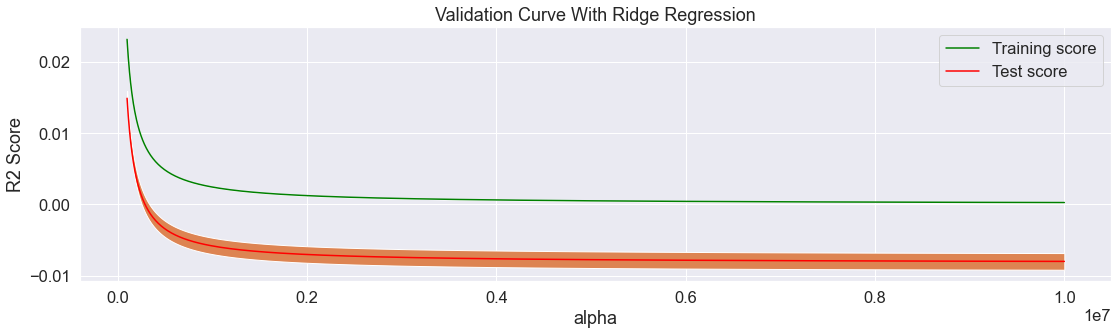

In [89]:
# Calculate mean and standard deviation for training set scores
train_mean = np.mean(train_scores, axis=1)
train_std  = np.std(train_scores, axis=1)

# Calculate mean and standard deviation for test set scores
test_mean = np.mean(test_scores, axis=1)
test_std  = np.std(test_scores, axis=1)

plt.figure(figsize= (16, 5))
# Plot mean accuracy scores for training and test sets
plt.plot(param_range, train_mean, label="Training score", color="green")
plt.plot(param_range, test_mean,  label="Test score", color="red")

# Plot accurancy bands for training and test sets
plt.fill_between(param_range, train_mean - train_std * 0.1, train_mean + train_std * 0.1)
plt.fill_between(param_range, test_mean -  test_std *  0.1, test_mean + test_std * 0.1)

# Create plot
plt.title("Validation Curve With Ridge Regression")
plt.xlabel(param)
plt.ylabel("R2 Score")
plt.tight_layout()
plt.legend(loc="best")
plt.show()

### We are getting similar results by validation curve as that were observed in Grid search CV.We observed that when we fit the ridge model by using constant value of alpha( 10^5 and 10^6) we got R2 score much better than Grid search CV and Validation curve. We can use Cross Validate Function to further prove or results.


In [90]:
from sklearn.model_selection import cross_validate

In [91]:
model= linear_model.Ridge(alpha=10^5, fit_intercept=False)

In [92]:
scoring = ['r2', 'neg_mean_squared_error']

scores = cross_validate(model, 
                        X=X, 
                        y=y, 
                        scoring=scoring, 
                        cv=5, 
                        return_train_score=True)

In [93]:
scores

{'fit_time': array([0.03790116, 0.04088879, 0.03789616, 0.03989077, 0.03690028]),
 'score_time': array([0.00897717, 0.00897861, 0.00797844, 0.00997376, 0.01196575]),
 'test_r2': array([0.54709776, 0.4020244 , 0.58805588, 0.51070586, 0.62376829]),
 'train_r2': array([0.57777201, 0.63115784, 0.57763206, 0.59103608, 0.56765618]),
 'test_neg_mean_squared_error': array([ -69.15707697, -122.01372125,  -62.78814102,  -77.59420662,
         -49.65172778]),
 'train_neg_mean_squared_error': array([-68.68826205, -55.16595622, -68.76406089, -65.94643989,
        -72.24174937])}

In [94]:
for key in scores:
    print(key, scores[key].mean())

fit_time 0.03869543075561523
score_time 0.00957474708557129
test_r2 0.5343304387467757
train_r2 0.5890508330108796
test_neg_mean_squared_error -76.24097472803868
train_neg_mean_squared_error -66.1612936844437


Results observed are same when we fit the model using particular values of alpha
Two observations:1) R2 score is quite less that explains model is not accurate
2) Model is overfitting over training set

# Using Gradient Boosting Algorithm

In [95]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [96]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=13
)

###Define the parameters

params = {
    "n_estimators": 100,
    "max_depth": 4,
    "min_samples_split": 5,
    "learning_rate": 0.01,
    "loss": "squared_error",
}

In [97]:
###Instantiate the regressor
GB = GradientBoostingRegressor(**params)

###Fit the regressor
GB.fit(X_train, y_train)
y_pred=GB.predict(X_test)


###Determine the metrics for regressor
mse = mean_squared_error(y_test, y_pred)
r_squared=r2_score(y_test, y_pred)
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))
print('r_sqaured value is equal to', r_squared)

The mean squared error (MSE) on test set: 81.0631
r_sqaured value is equal to 0.48117250760862995


### It can be obseved that mean sqaured error is much high and r2_score is also less, we need to perform hyperparameter tuning to Improve the metrics.

## Lets try cross validation to ensure to reverify the values of metrics

In [98]:
scoring = ['r2', 'neg_mean_squared_error']

scores = cross_validate(GB, 
                        X=X, 
                        y=y, 
                        scoring=scoring, 
                        cv=5, 
                        return_train_score=True)

In [99]:
scores

{'fit_time': array([2.84143353, 2.79356647, 2.77458382, 2.78156829, 2.7516818 ]),
 'score_time': array([0.0099721 , 0.00996804, 0.00997066, 0.0109942 , 0.00996566]),
 'test_r2': array([0.52711899, 0.38279302, 0.52562141, 0.47374675, 0.55183328]),
 'train_r2': array([0.49139752, 0.54564378, 0.50155353, 0.50744287, 0.49254681]),
 'test_neg_mean_squared_error': array([ -72.20778631, -125.9377834 ,  -72.30434407,  -83.45532981,
         -59.14507309]),
 'train_neg_mean_squared_error': array([-82.73970765, -67.95588593, -81.15010617, -79.42605008,
        -84.79202067])}

In [100]:
for key in scores:
    print(key, scores[key].mean())

fit_time 2.788566780090332
score_time 0.010174131393432618
test_r2 0.49222268968554783
train_r2 0.5077169012576889
test_neg_mean_squared_error -82.61006333767304
train_neg_mean_squared_error -79.21275409913011


It can be seen that the values of metrics with cross validation are matching with the metrics of fit. 
Hence we are in the right direction. Just need to some hyper parameter tuning to improv the results.

### Hyperparameter tuning for Gradient Boosting

#### 1. Defining Parameters for Gradient Boosting Regressor

In [101]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=13
)

params = {
    "loss": "squared_error",
    "learning_rate": 0.08,
    "min_samples_split": 42,
    "min_samples_leaf":10,
    "max_depth": 5,
    "max_features":"sqrt",
    "subsample":0.8,
    "random_state":10    
}

#### 2. First Decide the Learning rate and tune the n_estimators. (Boosting Parameters)

In [102]:
param_name = "n_estimators"
param_range = np.arange(20, 120, 10)

In [103]:
gbm1 = GradientBoostingRegressor(**params)

In [104]:
train_scores, test_scores = validation_curve(gbm1, 
                                             X, 
                                             y, 
                                             param_name="n_estimators", 
                                             param_range=param_range,
                                             cv=5, 
                                             scoring="r2", 
                                             n_jobs=-1)

### Use validation Curve to see the variation in r2 score with changing number of estimators

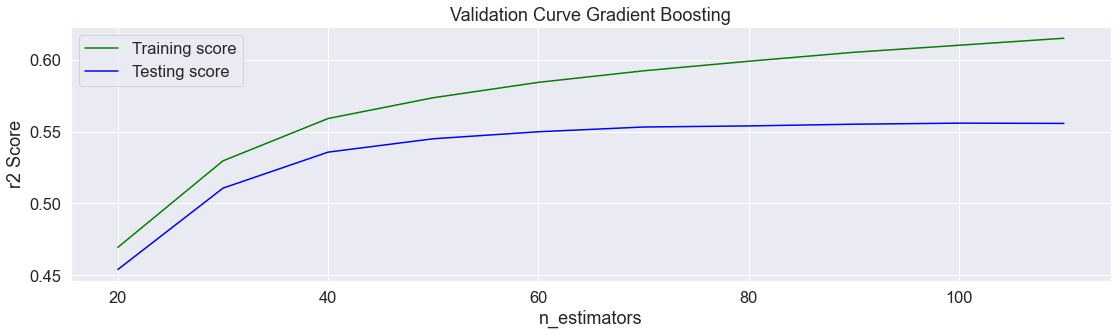

In [105]:
# Calculate mean and standard deviation for training set scores
train_mean = np.mean(train_scores, axis=1)
train_std  = np.std(train_scores, axis=1)

# Calculate mean and standard deviation for test set scores
test_mean = np.mean(test_scores, axis=1)
test_std  = np.std(test_scores, axis=1)

plt.figure(figsize= (16, 5))
# Plot mean r2 scores for training and test sets
plt.plot(param_range, train_mean, label="Training score", color="green")
plt.plot(param_range, test_mean,  label="Testing score", color="blue")

# Plot accurancy bands for training and test sets
#plt.fill_between(param_range, train_mean - train_std * 0.1, train_mean + train_std * 0.1)
#plt.fill_between(param_range, test_mean -  test_std *  0.1, test_mean + test_std * 0.1)

# Create plot
plt.title("Validation Curve Gradient Boosting")
plt.xlabel(param_name)
plt.ylabel("r2 Score")
plt.tight_layout()
plt.legend(loc="best")
plt.show()

From Validation Curve it can be seen that model starts overfitting after n_estimators=40

### We will use Grid_search CV to find best n_estimators

In [106]:
kf = KFold(n_splits=5, shuffle=True, random_state=100)

In [107]:
parameters = dict(
                n_estimators= param_range,
            )

In [108]:
##instantiate the grid search CV
grid = GridSearchCV(estimator = gbm1, 
                   param_grid = parameters, 
                   scoring    = 'r2',
                   cv=kf,
                   verbose=1)

In [109]:
grid.fit(X, y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             estimator=GradientBoostingRegressor(learning_rate=0.08,
                                                 max_depth=5,
                                                 max_features='sqrt',
                                                 min_samples_leaf=10,
                                                 min_samples_split=42,
                                                 random_state=10,
                                                 subsample=0.8),
             param_grid={'n_estimators': array([ 20,  30,  40,  50,  60,  70,  80,  90, 100, 110])},
             scoring='r2', verbose=1)

In [110]:
print('Best params : \n', grid.best_params_)
print(grid.best_score_)

Best params : 
 {'n_estimators': 100}
0.5570153007850742


It is giving best estimator as 90. Though the model is overfitting for this value of n_estimators, We wil use this for further model training as it is possible that The overfitting reduces by Tuning tree based parameters.
**learning_rate=0.08 and n_estimators=90**

#### 3. Tuning Tree parameters

In [111]:
## First We will tune max_depth and min_sample split
params2 = {
    "loss": "squared_error",
    "learning_rate": 0.08,
    "n_estimators": 90,
    "min_samples_leaf":10,
    "max_features":"sqrt",
    "subsample":0.8,
    "random_state":10    
}


In [112]:
max_depth_range=np.arange(3, 15, 2)
min_samples_split_range=np.arange(10, 45, 5)

In [113]:
parameters = dict(
                max_depth= max_depth_range,
                min_samples_split=min_samples_split_range
            )

In [114]:
gbm2 = GradientBoostingRegressor(**params2)

In [115]:
grid2= GridSearchCV(estimator = gbm2, 
                   param_grid = parameters, 
                   scoring    = 'r2',
                   cv=kf,
                   verbose=1)

In [116]:
grid2.fit(X, y)

Fitting 5 folds for each of 42 candidates, totalling 210 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             estimator=GradientBoostingRegressor(learning_rate=0.08,
                                                 max_features='sqrt',
                                                 min_samples_leaf=10,
                                                 n_estimators=90,
                                                 random_state=10,
                                                 subsample=0.8),
             param_grid={'max_depth': array([ 3,  5,  7,  9, 11, 13]),
                         'min_samples_split': array([10, 15, 20, 25, 30, 35, 40])},
             scoring='r2', verbose=1)

In [117]:
print('Best params : \n', grid2.best_params_)
print(grid2.best_score_)

Best params : 
 {'max_depth': 5, 'min_samples_split': 40}
0.556959751753171


In [118]:
## validate the score by cross validate
gbm2_val=GradientBoostingRegressor(**params2,max_depth=5,min_samples_split=35)

In [119]:
## validate the score by cross validate
scoring = ['r2', 'neg_mean_squared_error']

scores = cross_validate(gbm2_val, 
                        X=X, 
                        y=y, 
                        scoring=scoring, 
                        cv=5, 
                        return_train_score=True)

In [120]:
scores

{'fit_time': array([0.25332093, 0.29720521, 0.24837804, 0.25130463, 0.26429796]),
 'score_time': array([0.01097798, 0.01496077, 0.00993156, 0.00997138, 0.00993276]),
 'test_r2': array([0.59894216, 0.42821948, 0.59107033, 0.5364548 , 0.62583816]),
 'train_r2': array([0.59160227, 0.64458782, 0.59720333, 0.60715571, 0.58513446]),
 'test_neg_mean_squared_error': array([ -61.24056225, -116.66875664,  -62.32868129,  -73.51083743,
         -49.37856464]),
 'train_neg_mean_squared_error': array([-66.43834777, -53.157299  , -65.57773924, -63.34711025,
        -69.32124646])}

In [121]:
for key in scores:
    print(key, scores[key].mean())

fit_time 0.26290135383605956
score_time 0.011154890060424805
test_r2 0.5561049859035725
train_r2 0.6051367164342384
test_neg_mean_squared_error -72.62548045052515
train_neg_mean_squared_error -63.568348542948044


Test r sqaured value is nearly same obtained by GridSearchCV and Cross Validate. So we can use 
**Max Depth=5 and Min_samples_split=35**

**Note: There not such significant improvement in R sqaured value.**

In [122]:
### Now we will tune max_features

params3 = {
    "loss": "squared_error",
    "learning_rate": 0.08,
    "n_estimators": 90,
    "min_samples_split":35,
    "min_samples_leaf":10,
    "max_depth": 5,
    "subsample":0.8,
    "random_state":10    
}

In [123]:
max_features_range=np.arange(30, 90, 4)

In [124]:
parameters = dict(
                max_features= max_features_range
            )

In [125]:
gbm3 = GradientBoostingRegressor(**params3)

In [126]:
grid3= GridSearchCV(estimator = gbm3, 
                   param_grid = parameters, 
                   scoring    = 'r2',
                   cv=kf,
                   verbose=1)

In [127]:
grid3.fit(X, y)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             estimator=GradientBoostingRegressor(learning_rate=0.08,
                                                 max_depth=5,
                                                 min_samples_leaf=10,
                                                 min_samples_split=35,
                                                 n_estimators=90,
                                                 random_state=10,
                                                 subsample=0.8),
             param_grid={'max_features': array([30, 34, 38, 42, 46, 50, 54, 58, 62, 66, 70, 74, 78, 82, 86])},
             scoring='r2', verbose=1)

In [128]:
print('Best params : \n', grid3.best_params_)
print(grid3.best_score_)

Best params : 
 {'max_features': 54}
0.5594481223102802


In [129]:
## validate the score by cross validate
gbm3_val=GradientBoostingRegressor(**params3,max_features=42)

## validate the score by cross validate
scoring = ['r2', 'neg_mean_squared_error']

scores = cross_validate(gbm3_val, 
                        X=X, 
                        y=y, 
                        scoring=scoring, 
                        cv=5, 
                        return_train_score=True)

for key in scores:
    print(key, scores[key].mean())

fit_time 0.4585881233215332
score_time 0.010769939422607422
test_r2 0.5605189783243375
train_r2 0.6253328868251543
test_neg_mean_squared_error -71.96954754825103
train_neg_mean_squared_error -60.316266189233204


Results for Grid search and Cross Validate are nearly same. 

**Note:There is not much significant improvement in R sqaured value. Also model overfitting is the problem. Gradient Boosting cannot be used for this problem We shoud try different algorithm.**

# XGBoost Algorithm

In [130]:
from xgboost import XGBRegressor

In [131]:
my_model = XGBRegressor()

In [132]:
my_model.fit(X_train, y_train, verbose=False)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [133]:
y_pred = my_model.predict(X_test)

In [134]:
print('r2 value                : ', metrics.r2_score(y_test, y_pred))

r2 value                :  0.4659953955371119


# Hyperparameter Tuning for XGboost

### 1. Tune the the number of estimators

In [135]:
#### First Select the learning rate and then tune n_estimators
params1={
 "learning_rate"    : 0.1  ,
 "max_depth"        : 5,
 "min_child_weight" : 1,
 "gamma"            : 0 ,
 "colsample_bytree" : 0.8
    }

In [136]:
##Instantiate the regressor
XGB1 = XGBRegressor(**params1)

In [137]:
##range for parameters
param_name = "n_estimators"
n_estimators_range = np.arange(20, 120, 10)

In [138]:
parameters = dict(
                n_estimators= n_estimators_range
            )

In [139]:
##using Grid search CV to find best parameter
grid1= GridSearchCV(estimator = XGB1, 
                   param_grid = parameters, 
                   scoring    = 'r2',
                   cv=kf,
                   verbose=1)

In [140]:
grid1.fit(X, y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None, colsample_bytree=0.8,
                                    enable_categorical=False, gamma=0,
                                    gpu_id=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=0.1, max_delta_step=None,
                                    max_depth=5, min_child_weight=1,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None, predictor=None,
                                    random_state=None, reg_alpha=None,
                                    reg_lambda=None, scale_pos_weight=None,
                                    subsample=None, tree_method=None,
                                    validate_parameters=None, verbosity=None),
             param_grid={'n_estimators': array([ 20,  30,  40,  50,  60,  70,  80,  90, 100, 110])},
             scoring='r2', verbose=1)

In [141]:
print('Best params : \n', grid1.best_params_)
print(grid1.best_score_)

Best params : 
 {'n_estimators': 60}
0.563914789871974


In [142]:
## validate the score by cross validate
XGB1_val=XGBRegressor(**params1,n_estimators=50)

## validate the score by cross validate
scoring = ['r2', 'neg_mean_squared_error']

scores = cross_validate(XGB1_val, 
                        X=X, 
                        y=y, 
                        scoring=scoring, 
                        cv=5, 
                        return_train_score=True)

for key in scores:
    print(key, scores[key].mean())

fit_time 0.8744616508483887
score_time 0.01316537857055664
test_r2 0.5629731728452589
train_r2 0.6347564249986947
test_neg_mean_squared_error -71.67062889007997
train_neg_mean_squared_error -58.8079053142347


#### Note: Model is overfitting  and r2 score is also less

### Step 2: Tune max_depth and min_child_weight

In [143]:
##Deifne rest of the parameters
params2={
 "learning_rate"    : 0.1  ,
 "n_estimators"     : 50,
 "gamma"            : 0 ,
 "colsample_bytree" : 0.8
    }

In [144]:
##Instantiate the regressor
XGB2 = XGBRegressor(**params2)

In [145]:
##range for parameters
max_depth_range = np.arange(1, 10, 2)
min_child_weight_range = np.arange(1, 6, 2)

In [146]:
parameters = dict(
                max_depth = max_depth_range,                 
                min_child_weight = min_child_weight_range
            )

In [147]:
##using Grid search CV to find best parameter
grid2= GridSearchCV(estimator = XGB2, 
                   param_grid = parameters, 
                   scoring    = 'r2',
                   cv=kf,
                   verbose=1)

In [148]:
grid2.fit(X, y)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None, colsample_bytree=0.8,
                                    enable_categorical=False, gamma=0,
                                    gpu_id=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=0.1, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=50, n_jobs=None,
                                    num_parallel_tree=None, predictor=None,
                                    random_state=None, reg_alpha=None,
                                    reg_lambda=None, scale_pos_weight=None,
                                    subsample=None, tree_method=None,
                                    validate_parameters=None, verbosity=None),
             param_grid={'max_depth': array([1, 3, 5, 7, 9]),
                         'min_child_weight': array([1, 3, 5])},
             scoring='r2', verbose=1)

In [149]:
print('Best params : \n', grid2.best_params_)
print(grid2.best_score_)

Best params : 
 {'max_depth': 3, 'min_child_weight': 3}
0.5664410119290948


#### Using Validation curve to find optimum value for parameters

In [150]:
XGB2 = XGBRegressor(**params2)

In [151]:
##Optimum value of max_depth

param_name = 'max_depth'
param_range=max_depth_range
train_scores, test_scores = validation_curve(XGB2, 
                                             X, 
                                             y, 
                                             param_name = 'max_depth', 
                                             param_range=max_depth_range,
                                             cv=5, 
                                             scoring="r2", 
                                             n_jobs=-1)

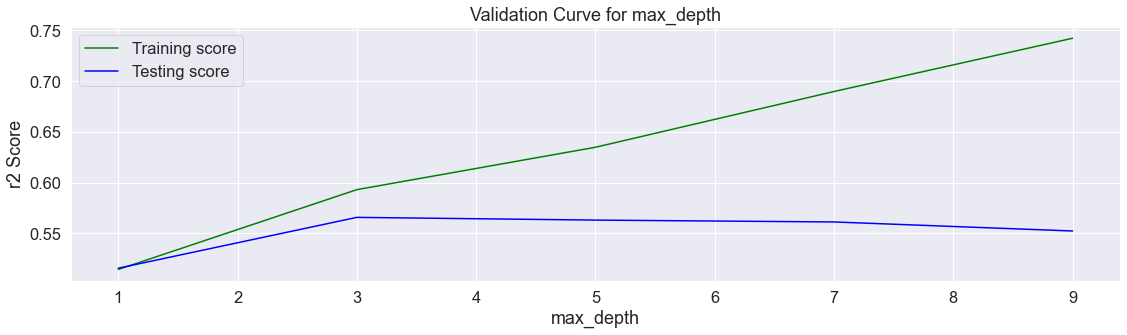

In [152]:
##Use validation Curve to see the variation in r2 score with changing max_depth

# Calculate mean and standard deviation for training set scores
train_mean = np.mean(train_scores, axis=1)
train_std  = np.std(train_scores, axis=1)

# Calculate mean and standard deviation for test set scores
test_mean = np.mean(test_scores, axis=1)
test_std  = np.std(test_scores, axis=1)

plt.figure(figsize= (16, 5))
# Plot mean r2 scores for training and test sets
plt.plot(param_range, train_mean, label="Training score", color="green")
plt.plot(param_range, test_mean,  label="Testing score", color="blue")

# Plot accurancy bands for training and test sets
#plt.fill_between(param_range, train_mean - train_std * 0.1, train_mean + train_std * 0.1)
#plt.fill_between(param_range, test_mean -  test_std *  0.1, test_mean + test_std * 0.1)

# Create plot
plt.title("Validation Curve for max_depth")
plt.xlabel(param_name)
plt.ylabel("r2 Score")
plt.tight_layout()
plt.legend(loc="best")
plt.show()

In [153]:
###Optimum value of min_child_weight

XGB2 = XGBRegressor(**params2,max_depth=3)



In [154]:
min_child_weight_range = np.arange(1, 9, 2)

In [155]:
param_name = 'min_child_weight'
param_range=min_child_weight_range
train_scores, test_scores = validation_curve(XGB2, 
                                             X, 
                                             y, 
                                             param_name = 'min_child_weight', 
                                             param_range=min_child_weight_range,
                                             cv=5, 
                                             scoring="r2", 
                                             n_jobs=-1)

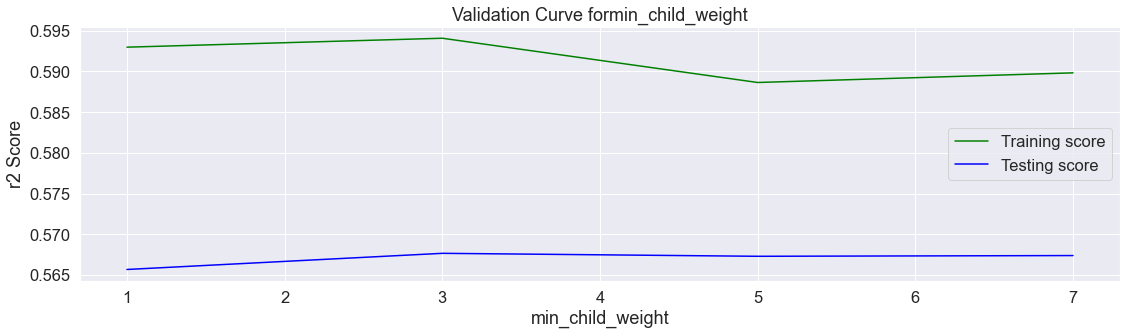

In [156]:
##Use validation Curve to see the variation in r2 score with changing min_child_weight

# Calculate mean and standard deviation for training set scores
train_mean = np.mean(train_scores, axis=1)
train_std  = np.std(train_scores, axis=1)

# Calculate mean and standard deviation for test set scores
test_mean = np.mean(test_scores, axis=1)
test_std  = np.std(test_scores, axis=1)

plt.figure(figsize= (16, 5))
# Plot mean r2 scores for training and test sets
plt.plot(param_range, train_mean, label="Training score", color="green")
plt.plot(param_range, test_mean,  label="Testing score", color="blue")

# Plot accurancy bands for training and test sets
#plt.fill_between(param_range, train_mean - train_std * 0.1, train_mean + train_std * 0.1)
#plt.fill_between(param_range, test_mean -  test_std *  0.1, test_mean + test_std * 0.1)

# Create plot
plt.title("Validation Curve formin_child_weight")
plt.xlabel(param_name)
plt.ylabel("r2 Score")
plt.tight_layout()
plt.legend(loc="best")
plt.show()

#### Grid Search results: max_depth=3, min_child_weight= 3
#### Validation Curve Results : max_depth=3, min_child_weight=5 (Min child weight is considered as 5 as it has less overfitting that value of 3

#### Final Params: max_depth=3, min_child_weight= 5

#### Model Performance has increased, r2 score increased.

### Step 3: Tune gamma

In [157]:
##Deifne rest of the parameters
params3={
 "learning_rate"    : 0.1  ,
 "max_depth"       : 3,
 "min_child_weight" : 5,
 "n_estimators"     : 50,
 "colsample_bytree" : 0.8
    }

##Instantiate the regressor
XGB3 = XGBRegressor(**params3)



##range for parameters
gamma_range=[i/10.0 for i in range(0,5)]


parameters = dict(
              gamma=gamma_range
            )

##using Grid search CV to find best parameter
grid3= GridSearchCV(estimator = XGB3, 
                   param_grid = parameters, 
                   scoring    = 'r2',
                   cv=kf,
                   verbose=1)

grid3.fit(X, y)



Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None, colsample_bytree=0.8,
                                    enable_categorical=False, gamma=None,
                                    gpu_id=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=0.1, max_delta_step=None,
                                    max_depth=3, min_child_weight=5,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=50, n_jobs=None,
                                    num_parallel_tree=None, predictor=None,
                                    random_state=None, reg_alpha=None,
                                    reg_lambda=None, scale_pos_weight=None,
                                    subsample=None, tree_method=None,
                                    validate_parameters=None, verbosity=None),
             param_grid={'gamma': [0.0, 0.1, 0.2, 0.3, 0.4]}, scoring='r2',
             verbose=1)

In [158]:
print('Best params : \n', grid3.best_params_)
print(grid3.best_score_)

Best params : 
 {'gamma': 0.0}
0.5653723279320733


In [159]:
###Check for validation curve results
gamma_range=[i/10.0 for i in range(0,8)]
param_name = 'gamma'
param_range=gamma_range
train_scores, test_scores = validation_curve(XGB3, 
                                             X, 
                                             y, 
                                             param_name = 'gamma', 
                                             param_range=gamma_range,
                                             cv=5, 
                                             scoring="r2", 
                                             n_jobs=-1)



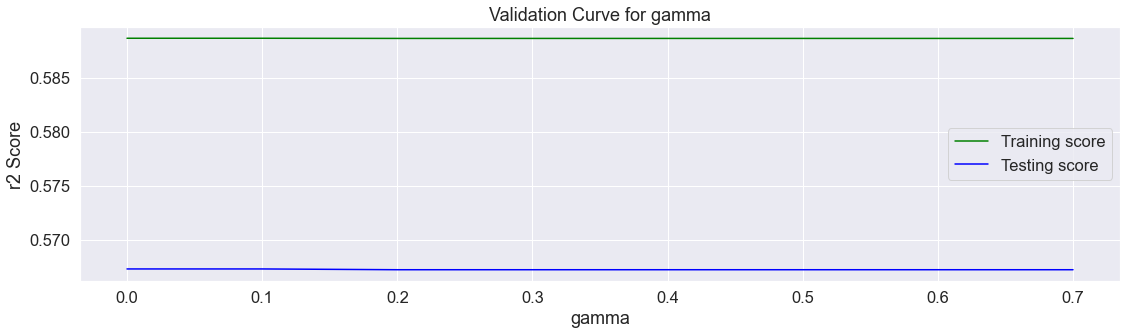

In [160]:
##Use validation Curve to see the variation in r2 score with changing gamma

# Calculate mean and standard deviation for training set scores
train_mean = np.mean(train_scores, axis=1)
train_std  = np.std(train_scores, axis=1)

# Calculate mean and standard deviation for test set scores
test_mean = np.mean(test_scores, axis=1)
test_std  = np.std(test_scores, axis=1)

plt.figure(figsize= (16, 5))
# Plot mean r2 scores for training and test sets
plt.plot(param_range, train_mean, label="Training score", color="green")
plt.plot(param_range, test_mean,  label="Testing score", color="blue")

# Plot accurancy bands for training and test sets
#plt.fill_between(param_range, train_mean - train_std * 0.1, train_mean + train_std * 0.1)
#plt.fill_between(param_range, test_mean -  test_std *  0.1, test_mean + test_std * 0.1)

# Create plot
plt.title("Validation Curve for gamma")
plt.xlabel(param_name)
plt.ylabel("r2 Score")
plt.tight_layout()
plt.legend(loc="best")
plt.show()

#### There is no change in model with change in value of gamma, Hence we will keep its value as 0
#### gamma=0

#### Till now we have got values of parameters as follows
#### n_estimators=50, max_depth=3, min_child_weight=5, gamma=0

### Step 4: Tune subsample and colsample_bytree

In [161]:
##Deifne rest of the parameters
params4={
 "learning_rate"    : 0.1  ,
 "max_depth"        : 3,
 "min_child_weight" : 5,
 "n_estimators"     : 50,
  "gamma"           : 0
    }

##Instantiate the regressor
XGB4 = XGBRegressor(**params4)



##range for parameters
subsample_range=[i/10.0 for i in range(6,10)]
colsample_bytree_range=[i/10.0 for i in range(6,10)]


parameters = dict(
              subsample=subsample_range,
              colsample_bytree=colsample_bytree_range
            )

##using Grid search CV to find best parameter
grid4= GridSearchCV(estimator = XGB4, 
                   param_grid = parameters, 
                   scoring    = 'r2',
                   cv=kf,
                   verbose=1)







In [162]:
grid4.fit(X, y)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    enable_categorical=False, gamma=0,
                                    gpu_id=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=0.1, max_delta_step=None,
                                    max_depth=3, min_child_weight=5,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=50, n_jobs=None,
                                    num_parallel_tree=None, predictor=None,
                                    random_state=None, reg_alpha=None,
                                    reg_lambda=None, scale_pos_weight=None,
                                    subsample=None, tree_method=None,
                                    validate_parameters=None, verbosity=None),
             param_grid={'colsample_bytree': [0.6, 0.7, 0.8, 0.9],
                         'subsample': [0.6, 0.7, 0.8, 0.9]},
             scoring='r2', verbose=1)

In [163]:
print('Best params : \n', grid4.best_params_)
print(grid4.best_score_)

Best params : 
 {'colsample_bytree': 0.9, 'subsample': 0.8}
0.5663932164742775


#### There is no difference between r2 score for previous settings and r2 score for changed values of subsample and colsample_by tree. So we can keep the values as 0.9 for both parameters.

## Step 5: Tuning Regularization Parameter

#### As we have large number of features in our dataset. We should tune the aplha parameter (that corresponds to L1 regularization) in XGboost.

In [164]:
##Deifne rest of the parameters
params5={
    "objective"     : 'reg:squarederror',
 "learning_rate"    : 0.1,
 "max_depth"        : 3,
 "min_child_weight" : 5,
 "n_estimators"     : 50,
  "gamma"           : 0,
  "colsample_bytree": 0.9, 
  "subsample"       : 0.9
    }

##Instantiate the regressor
XGB5 = XGBRegressor(**params5)

In [165]:
###Check for validation curve results
reg_alpha_range=[100,200,300,400]
param_name = 'reg_alpha'
param_range=reg_alpha_range
train_scores, test_scores = validation_curve(XGB5, 
                                             X, 
                                             y, 
                                             param_name = 'reg_alpha', 
                                             param_range=reg_alpha_range,
                                             cv=5, 
                                             scoring="r2", 
                                             n_jobs=-1)




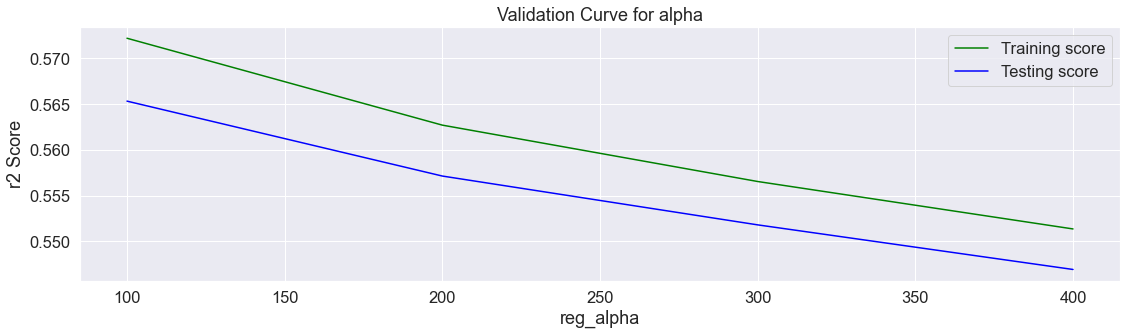

In [166]:
##Use validation Curve to see the variation in r2 score with changing alpha

# Calculate mean and standard deviation for training set scores
train_mean = np.mean(train_scores, axis=1)
train_std  = np.std(train_scores, axis=1)

# Calculate mean and standard deviation for test set scores
test_mean = np.mean(test_scores, axis=1)
test_std  = np.std(test_scores, axis=1)

plt.figure(figsize= (16, 5))
# Plot mean r2 scores for training and test sets
plt.plot(param_range, train_mean, label="Training score", color="green")
plt.plot(param_range, test_mean,  label="Testing score", color="blue")

# Plot accurancy bands for training and test sets
#plt.fill_between(param_range, train_mean - train_std * 0.1, train_mean + train_std * 0.1)
#plt.fill_between(param_range, test_mean -  test_std *  0.1, test_mean + test_std * 0.1)

# Create plot
plt.title("Validation Curve for alpha")
plt.xlabel(param_name)
plt.ylabel("r2 Score")
plt.tight_layout()
plt.legend(loc="best")
plt.show()

#### L1 regression coefficient alpha gives best results when it has value of 100

## Step6: Reducing the learning rate

In [167]:
##Deifne rest of the parameters
params6={
    "objective"     : 'reg:squarederror',
 "max_depth"        : 3,
 "min_child_weight" : 5,
 "n_estimators"     : 70,
  "gamma"           : 0,
  "colsample_bytree": 0.9, 
  "subsample"       : 0.9,
    "reg_alpha"     : 100
    }

##Instantiate the regressor
XGB6 = XGBRegressor(**params6)

In [168]:
learning_rate_range=[0.05,0.06,0.07,0.08,0.09]
param_name = 'learning_rate'
param_range=learning_rate_range
train_scores, test_scores = validation_curve(XGB6, 
                                             X, 
                                             y, 
                                             param_name = 'learning_rate', 
                                             param_range=learning_rate_range,
                                             cv=5, 
                                             scoring="r2", 
                                             n_jobs=-1)

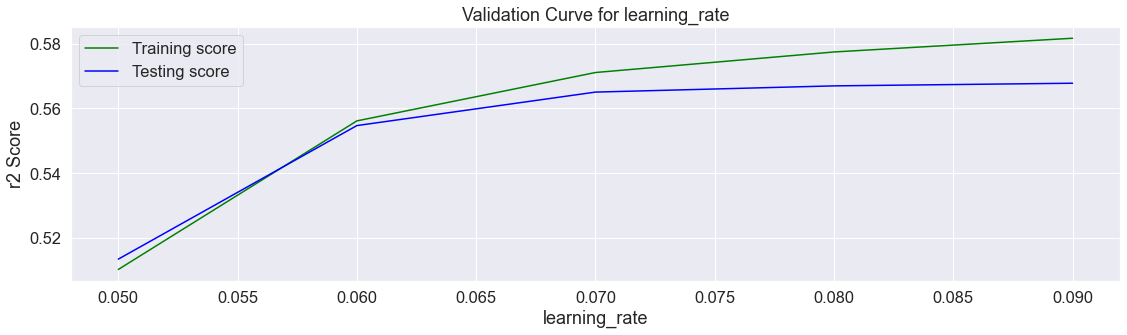

In [169]:
##Use validation Curve to see the variation in r2 score with changing learning rate

# Calculate mean and standard deviation for training set scores
train_mean = np.mean(train_scores, axis=1)
train_std  = np.std(train_scores, axis=1)

# Calculate mean and standard deviation for test set scores
test_mean = np.mean(test_scores, axis=1)
test_std  = np.std(test_scores, axis=1)

plt.figure(figsize= (16, 5))
# Plot mean r2 scores for training and test sets
plt.plot(param_range, train_mean, label="Training score", color="green")
plt.plot(param_range, test_mean,  label="Testing score", color="blue")

# Plot accurancy bands for training and test sets
#plt.fill_between(param_range, train_mean - train_std * 0.1, train_mean + train_std * 0.1)
#plt.fill_between(param_range, test_mean -  test_std *  0.1, test_mean + test_std * 0.1)

# Create plot
plt.title("Validation Curve for learning_rate")
plt.xlabel(param_name)
plt.ylabel("r2 Score")
plt.tight_layout()
plt.legend(loc="best")
plt.show()

#### When Learning rate is reduced to 0.07 and at the same time n_estimators are increased to 60. This improved the metrics as well as reduced overfitting.

#### So the final parameters for XGboost model are as follows:
#### "objective"                : 'reg:squarederror',
#### "learning_rate          : 0.07
#### "max_depth"            : 3,
#### "min_child_weight" : 5,
#### "n_estimators"         : 60,
#### "gamma"                   : 0,
####  "colsample_bytree": 0.9, 
####  "subsample"            : 0.9,
####  "reg_alpha"              : 100

In [186]:
###We will fit the model by using these parameters
params_final={
    "objective"     : 'reg:squarederror',
    "learning_rate" : 0.07,
 "max_depth"        : 3,
 "min_child_weight" : 5,
 "n_estimators"     : 60,
  "gamma"           : 0,
  "colsample_bytree": 0.9, 
  "subsample"       : 0.8,
    "reg_alpha"     : 100
    }


In [187]:
##Instantiate the regressor
XGB_final = XGBRegressor(**params_final)

In [188]:
## Fit the model
model=XGB_final.fit(X_train,y_train)

In [189]:
##Make the predictions
y_pred=model.predict(X_test)

In [190]:
###Evaluate the metrics
print('Mean Abs Error   MAE    : ', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Sq  Error MSE      : ', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Sq Error RMSE : ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('MAPE                    : ', np.mean(np.abs((y_test - y_pred) / y_test)) * 100)
print('MPE                     : ', np.mean((y_test - y_pred) / y_test) * 100)
print('r2 value                : ', metrics.r2_score(y_test, y_pred))

Mean Abs Error   MAE    :  5.106907319637489
Mean Sq  Error MSE      :  73.16069542764161
Root Mean Sq Error RMSE :  8.553402564339036
MAPE                    :  4.790031317056492
MPE                     :  0.6207266080846136
r2 value                :  0.5259909384296072


### We can see that R squared value is much better than Multiple Linear Regression and Gradient Boosting Algorithm. Also the Mean Absolute Percentage error is 4.79% Which informs that model is quite good.
### Also we can see that mean value of target variable is 100. Whereas, the Mean Absolute error is almost around 5. So this is quite acceptable.

## We can use Feature importance further to improve the model 

In [175]:
print(model.feature_importances_)

[1.8044572e-03 0.0000000e+00 0.0000000e+00 5.4452722e-03 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 7.5103517e-04
 2.9589420e-03 6.2452178e-02 0.0000000e+00 0.0000000e+00 0.0000000e+00
 3.3254465e-03 1.1372451e-02 0.0000000e+00 7.0100854e-04 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 7.3441574e-03 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 3.1333256e-03 0.0000000e+00
 0.0000000e+00 0.0000000e+00 3.9448342e-03 5.9777419e-03 6.7581632e-04
 8.4772920e-03 0.0000000e+00 4.7499957e-04 4.7708875e-03 0.0000000e+00
 3.7873842e-04 0.0000000e+00 0.0000000e+00 6.1960099e-03 1.4601210e-03
 2.3026590e-03 2.2297297e-03 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 5.7937056e-03
 0.0000000e+00 0.0000000e+00 4.6729975e-04 6.4520077e-03 1.7031223e-03
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.000

In [220]:
L=list(model.feature_importances_)

In [221]:
L

[0.0,
 0.0,
 0.0,
 0.0017955016,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0002358226,
 0.006933616,
 0.05254482,
 0.0,
 0.0,
 0.0,
 0.0033812667,
 0.014067528,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0077717537,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0071850284,
 0.0,
 0.006173397,
 0.008290983,
 0.0,
 0.0012399651,
 0.0052929814,
 0.0072904015,
 0.0,
 0.0024253302,
 0.0,
 0.0,
 0.0,
 0.0,
 0.00045912553,
 0.0,
 0.0,
 0.0060128667,
 0.0,
 0.0,
 0.0,
 0.0,
 0.00032783896,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0047902265,
 0.0,
 0.0,
 0.0,
 0.0055316347,
 0.0022988357,
 0.0,
 0.0011848374,
 0.0,
 0.0,
 0.0,
 0.0001152725,
 0.0,
 0.0027753483,
 0.0,
 0.0,
 0.0,
 0.00410392,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.00034975685,
 0.0015772831,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0023802198,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0035228904,
 0.0,
 0.008815053,
 0.0,
 0.0011263973,
 0.0,
 0.0015433709,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0048166024,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0043704277,
 0.0,
 

In [222]:
important_features= [num for num in L if num>0]

In [224]:
len(important_features)

69

#### There are only 69 features that impact the results by XGboost regressor model 

In [211]:
###feature importance feature for XGboost
#Available importance_types = [‘weight’, ‘gain’, ‘cover’, ‘total_gain’, ‘total_cover’]
FI=model.get_booster().get_score(importance_type= 'gain')

In [214]:
FI

{'X0_ay': 90.078125,
 'X0_w': 11.8309326171875,
 'X0_j': 347.85107421875,
 'X0_az': 2636.109619140625,
 'X1_aa': 169.634033203125,
 'X1_s': 705.750732421875,
 'X2_ai': 389.8994140625,
 'X3_c': 360.464111328125,
 'X3_a': 309.7117919921875,
 'X3_d': 415.948486328125,
 'X3_e': 62.20753479003906,
 'X5_v': 265.54241943359375,
 'X5_w': 365.75054931640625,
 'X5_r': 121.67585754394531,
 'X5_p': 23.033767700195312,
 'X5_ag': 301.658203125,
 'X5_ad': 16.447280883789062,
 'X6_l': 240.31982421875,
 'X8_s': 277.515380859375,
 'X8_f': 115.32978820800781,
 'X8_i': 59.44184875488281,
 'X8_w': 5.7830810546875,
 'X8_b': 139.23583984375,
 'X10': 205.888671875,
 'X24': 17.546875,
 'X26': 79.13037109375,
 'X38': 119.4127197265625,
 'X43': 176.73912048339844,
 'X47': 442.2404479980469,
 'X51': 56.509979248046875,
 'X56': 77.42903900146484,
 'X68': 241.64306640625,
 'X75': 219.259033203125,
 'X91': 52.40625,
 'X97': 64.5625,
 'X115': 598.2276000976562,
 'X117': 325.6197814941406,
 'X120': 407.7096252441406,


In [215]:
len(FI)

69

#### We will use these 69 features to build the model and predict the values.

In [226]:
FI.keys()

dict_keys(['X0_ay', 'X0_w', 'X0_j', 'X0_az', 'X1_aa', 'X1_s', 'X2_ai', 'X3_c', 'X3_a', 'X3_d', 'X3_e', 'X5_v', 'X5_w', 'X5_r', 'X5_p', 'X5_ag', 'X5_ad', 'X6_l', 'X8_s', 'X8_f', 'X8_i', 'X8_w', 'X8_b', 'X10', 'X24', 'X26', 'X38', 'X43', 'X47', 'X51', 'X56', 'X68', 'X75', 'X91', 'X97', 'X115', 'X117', 'X120', 'X133', 'X135', 'X144', 'X148', 'X158', 'X165', 'X215', 'X225', 'X227', 'X244', 'X275', 'X277', 'X287', 'X291', 'X305', 'X306', 'X311', 'X313', 'X314', 'X315', 'X316', 'X322', 'X324', 'X328', 'X329', 'X340', 'X348', 'X354', 'X362', 'X363', 'X380'])

In [240]:
### Using only important features for X_train
X_train_new=X_train[['X0_ay', 'X0_w', 'X0_j', 'X0_az', 'X1_aa', 'X1_s', 'X2_ai', 'X3_c', 'X3_a', 'X3_d', 'X3_e', 'X5_v', 'X5_w', 'X5_r', 'X5_p', 'X5_ag', 'X5_ad', 'X6_l', 'X8_s', 'X8_f', 'X8_i', 'X8_w', 'X8_b', 'X10', 'X24', 'X26', 'X38', 'X43', 'X47', 'X51', 'X56', 'X68', 'X75', 'X91', 'X97', 'X115', 'X117', 'X120', 'X133', 'X135', 'X144', 'X148', 'X158', 'X165', 'X215', 'X225', 'X227', 'X244', 'X275', 'X277', 'X287', 'X291', 'X305', 'X306', 'X311', 'X313', 'X314', 'X315', 'X316', 'X322', 'X324', 'X328', 'X329', 'X340', 'X348', 'X354', 'X362', 'X363', 'X380']]

In [242]:
X_train_new.shape

(3788, 69)

In [243]:
###using only important features for X_test
X_test_new=X_test[['X0_ay', 'X0_w', 'X0_j', 'X0_az', 'X1_aa', 'X1_s', 'X2_ai', 'X3_c', 'X3_a', 'X3_d', 'X3_e', 'X5_v', 'X5_w', 'X5_r', 'X5_p', 'X5_ag', 'X5_ad', 'X6_l', 'X8_s', 'X8_f', 'X8_i', 'X8_w', 'X8_b', 'X10', 'X24', 'X26', 'X38', 'X43', 'X47', 'X51', 'X56', 'X68', 'X75', 'X91', 'X97', 'X115', 'X117', 'X120', 'X133', 'X135', 'X144', 'X148', 'X158', 'X165', 'X215', 'X225', 'X227', 'X244', 'X275', 'X277', 'X287', 'X291', 'X305', 'X306', 'X311', 'X313', 'X314', 'X315', 'X316', 'X322', 'X324', 'X328', 'X329', 'X340', 'X348', 'X354', 'X362', 'X363', 'X380']]

In [244]:
X_test_new.shape

(421, 69)

In [ ]:
###Fit the XGboost model for new X_train and X_test

In [248]:
## Fit the model
New_model=XGB_final.fit(X_train_new,y_train)

In [249]:
##Make the predictions
y_pred=New_model.predict(X_test_new)

In [250]:
###Evaluate the metrics
print('Mean Abs Error   MAE    : ', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Sq  Error MSE      : ', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Sq Error RMSE : ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('MAPE                    : ', np.mean(np.abs((y_test - y_pred) / y_test)) * 100)
print('MPE                     : ', np.mean((y_test - y_pred) / y_test) * 100)
print('r2 value                : ', metrics.r2_score(y_test, y_pred))

Mean Abs Error   MAE    :  5.116042919747903
Mean Sq  Error MSE      :  73.3218354186071
Root Mean Sq Error RMSE :  8.562817025874551
MAPE                    :  4.8001099175634385
MPE                     :  0.609114515016884
r2 value                :  0.5249469104108393


## Conclusion:  MAPE for New model (with important features) is close to MAPE for the original model. Hence we can use both the models. While it is suggested to use the original model as Mercedes would be interested in knowing the impact of maximum number of parameters on Testing time.  